In [1]:
import numpy as np
import pandas as pd
import sklearn 
import glob
import datetime
from datetime import date, time, timedelta
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator

In [2]:
df = pd.read_csv('Escondido 2021 sunrise and sunset data/2021 Sunrise Sunset data full.csv')

In [3]:
df = df[df['Year'] == 2021]

In [4]:
df['Daylight Savings'] = 0

In [5]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [6]:
df

,Year,Month,Day,Age of Moon,Sunrise,Sunculm,Sunset,Constellation,Moonrise,Moonculm,Moonset,Daylight Savings,Date
0,2021,1,1,19 days,06:49,11:50,16:52,Sagittarius,19:30,01:48,09:02,0,2021-01-01
1,2021,1,3,20 days,06:49,11:51,16:52,Sagittarius,20:35,02:40,09:43,0,2021-01-03
2,2021,1,4,21 days,06:50,11:51,16:53,Sagittarius,21:39,03:31,10:20,0,2021-01-04
3,2021,1,5,22 days,06:50,11:52,16:54,Sagittarius,22:44,04:21,10:53,0,2021-01-05
4,2021,1,6,23 days,06:50,11:52,16:55,Sagittarius,23:49,05:09,11:26,0,2021-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2021,12,27,23 days,06:47,11:47,16:47,Sagittarius,23:59,05:27,11:48,0,2021-12-27
347,2021,12,28,24 days,06:48,11:48,16:48,Sagittarius,--:--,06:12,12:17,0,2021-12-28
348,2021,12,29,25 days,06:48,11:48,16:49,Sagittarius,01:02,06:59,12:48,0,2021-12-29
349,2021,12,30,26 days,06:48,11:49,16:49,Sagittarius,02:09,07:50,13:23,0,2021-12-30


In [7]:
df.loc[('2021-03-14' <= df['Date']) & (df['Date'] <= '2021-11-07'), 'Daylight Savings'] = 1

In [8]:
df = df.drop('Date', axis = 1)

In [9]:
for w in ['Sunrise', 'Sunculm', 'Sunset']:
    df[w] = df.apply(lambda x: datetime(year = x['Year'], month = x['Month'], day = x['Day'], hour = int(x[w].split(':')[0]), minute = int(x[w].split(':')[1]), second = 0), axis = 1)

In [10]:
for w in ['Sunrise', 'Sunculm', 'Sunset']:
    df.loc[df['Daylight Savings'] == 1, w] = df.loc[df['Daylight Savings'] == 1, w] - timedelta(hours = 1)

In [11]:
df

,Year,Month,Day,Age of Moon,Sunrise,Sunculm,Sunset,Constellation,Moonrise,Moonculm,Moonset,Daylight Savings
0,2021,1,1,19 days,2021-01-01 06:49:00,2021-01-01 11:50:00,2021-01-01 16:52:00,Sagittarius,19:30,01:48,09:02,0
1,2021,1,3,20 days,2021-01-03 06:49:00,2021-01-03 11:51:00,2021-01-03 16:52:00,Sagittarius,20:35,02:40,09:43,0
2,2021,1,4,21 days,2021-01-04 06:50:00,2021-01-04 11:51:00,2021-01-04 16:53:00,Sagittarius,21:39,03:31,10:20,0
3,2021,1,5,22 days,2021-01-05 06:50:00,2021-01-05 11:52:00,2021-01-05 16:54:00,Sagittarius,22:44,04:21,10:53,0
4,2021,1,6,23 days,2021-01-06 06:50:00,2021-01-06 11:52:00,2021-01-06 16:55:00,Sagittarius,23:49,05:09,11:26,0
...,...,...,...,...,...,...,...,...,...,...,...,...
346,2021,12,27,23 days,2021-12-27 06:47:00,2021-12-27 11:47:00,2021-12-27 16:47:00,Sagittarius,23:59,05:27,11:48,0
347,2021,12,28,24 days,2021-12-28 06:48:00,2021-12-28 11:48:00,2021-12-28 16:48:00,Sagittarius,--:--,06:12,12:17,0
348,2021,12,29,25 days,2021-12-29 06:48:00,2021-12-29 11:48:00,2021-12-29 16:49:00,Sagittarius,01:02,06:59,12:48,0
349,2021,12,30,26 days,2021-12-30 06:48:00,2021-12-30 11:49:00,2021-12-30 16:49:00,Sagittarius,02:09,07:50,13:23,0


In [12]:
df['Sun-up time length'] = df['Sunset']  - df['Sunrise']

In [13]:
df['Start of 2nd period'] = df['Sunrise'] + df['Sun-up time length']/5
df['Start of midday'] = df['Sunrise'] + 2*df['Sun-up time length']/5

df['Midday Range Left End'] = datetime(year = 2021, month = 4, 
                                day = 14, hour = 10, 
                                minute = 57, second = 0)

df['Midday Range Right End'] = datetime(year = 2021, month = 4, 
                                day = 14, hour = 12, 
                                minute = 8, second = 0)

df['End of midday'] = df['Sunrise'] + 3*df['Sun-up time length']/5
df['Start of final period'] = df['Sunrise'] + 4*df['Sun-up time length']/5




In [14]:
day_point_feature_list = ['Sunrise', 'Start of 2nd period', 'Start of midday', 
                          'Midday Range Left End', 'Midday Range Right End',
                         'End of midday', 'Start of final period', 'Sunset'
                          ]

In [15]:
df.loc[(df['Month'] == 4) & (df['Day'] == 14), day_point_feature_list]

,Sunrise,Start of 2nd period,Start of midday,Midday Range Left End,Midday Range Right End,End of midday,Start of final period,Sunset
99,2021-04-14 05:18:00,2021-04-14 07:53:48,2021-04-14 10:29:36,2021-04-14 10:57:00,2021-04-14 12:08:00,2021-04-14 13:05:24,2021-04-14 15:41:12,2021-04-14 18:17:00


In [16]:
timestamp_list = pd.Series(df.loc[(df['Month'] == 4) & (df['Day'] == 14), 
                                  day_point_feature_list
                                 ].values.flatten()).tolist()

In [17]:
timestamp_list

[Timestamp('2021-04-14 05:18:00'),
 Timestamp('2021-04-14 07:53:48'),
 Timestamp('2021-04-14 10:29:36'),
 Timestamp('2021-04-14 10:57:00'),
 Timestamp('2021-04-14 12:08:00'),
 Timestamp('2021-04-14 13:05:24'),
 Timestamp('2021-04-14 15:41:12'),
 Timestamp('2021-04-14 18:17:00')]

In [18]:
import matplotlib.pyplot as plt

In [19]:
plt.hlines(datetime(year = 2021, month = 4, 
                                day = 14, hour = 0, 
                                minute = 0, second = 0),
           datetime(year = 2021, month = 4, 
                                day = 14, hour = 23, 
                                minute = 59, second = 59))

plt.xlim(datetime(year = 2021, month = 4, 
                                day = 14, hour = 0, 
                                minute = 0, second = 0), 
        datetime(year = 2021, month = 4, 
                                day = 14, hour = 23, 
                                minute = 59, second = 59))
plt.ylim(0.5,1.5)

y = np.ones(np.shape(timestamp_list))   
plt.plot(timestamp_list,y,'|',ms = 40)  
plt.axis('off')
plt.show()

TypeError: hlines() missing 1 required positional argument: 'xmax'

In [20]:
df_april = df[df['Month'] == 4]

In [21]:
df_april.loc[:, 'Date'] = pd.to_datetime(df_april[['Year', 'Month', 'Day']])

C:\Users\sanka\AppData\Local\Temp\ipykernel_54468\1457109675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_april.loc[:, 'Date'] = pd.to_datetime(df_april[['Year', 'Month', 'Day']])


In [22]:
df_april_times = df_april[['Date'] + day_point_feature_list].set_index('Date').applymap(lambda x: time(hour = x.hour, minute = x.minute, second = x.second)).applymap(lambda x: str(x))
df_april_times = df_april_times.reset_index()

In [23]:
month_info = 'April 2021'

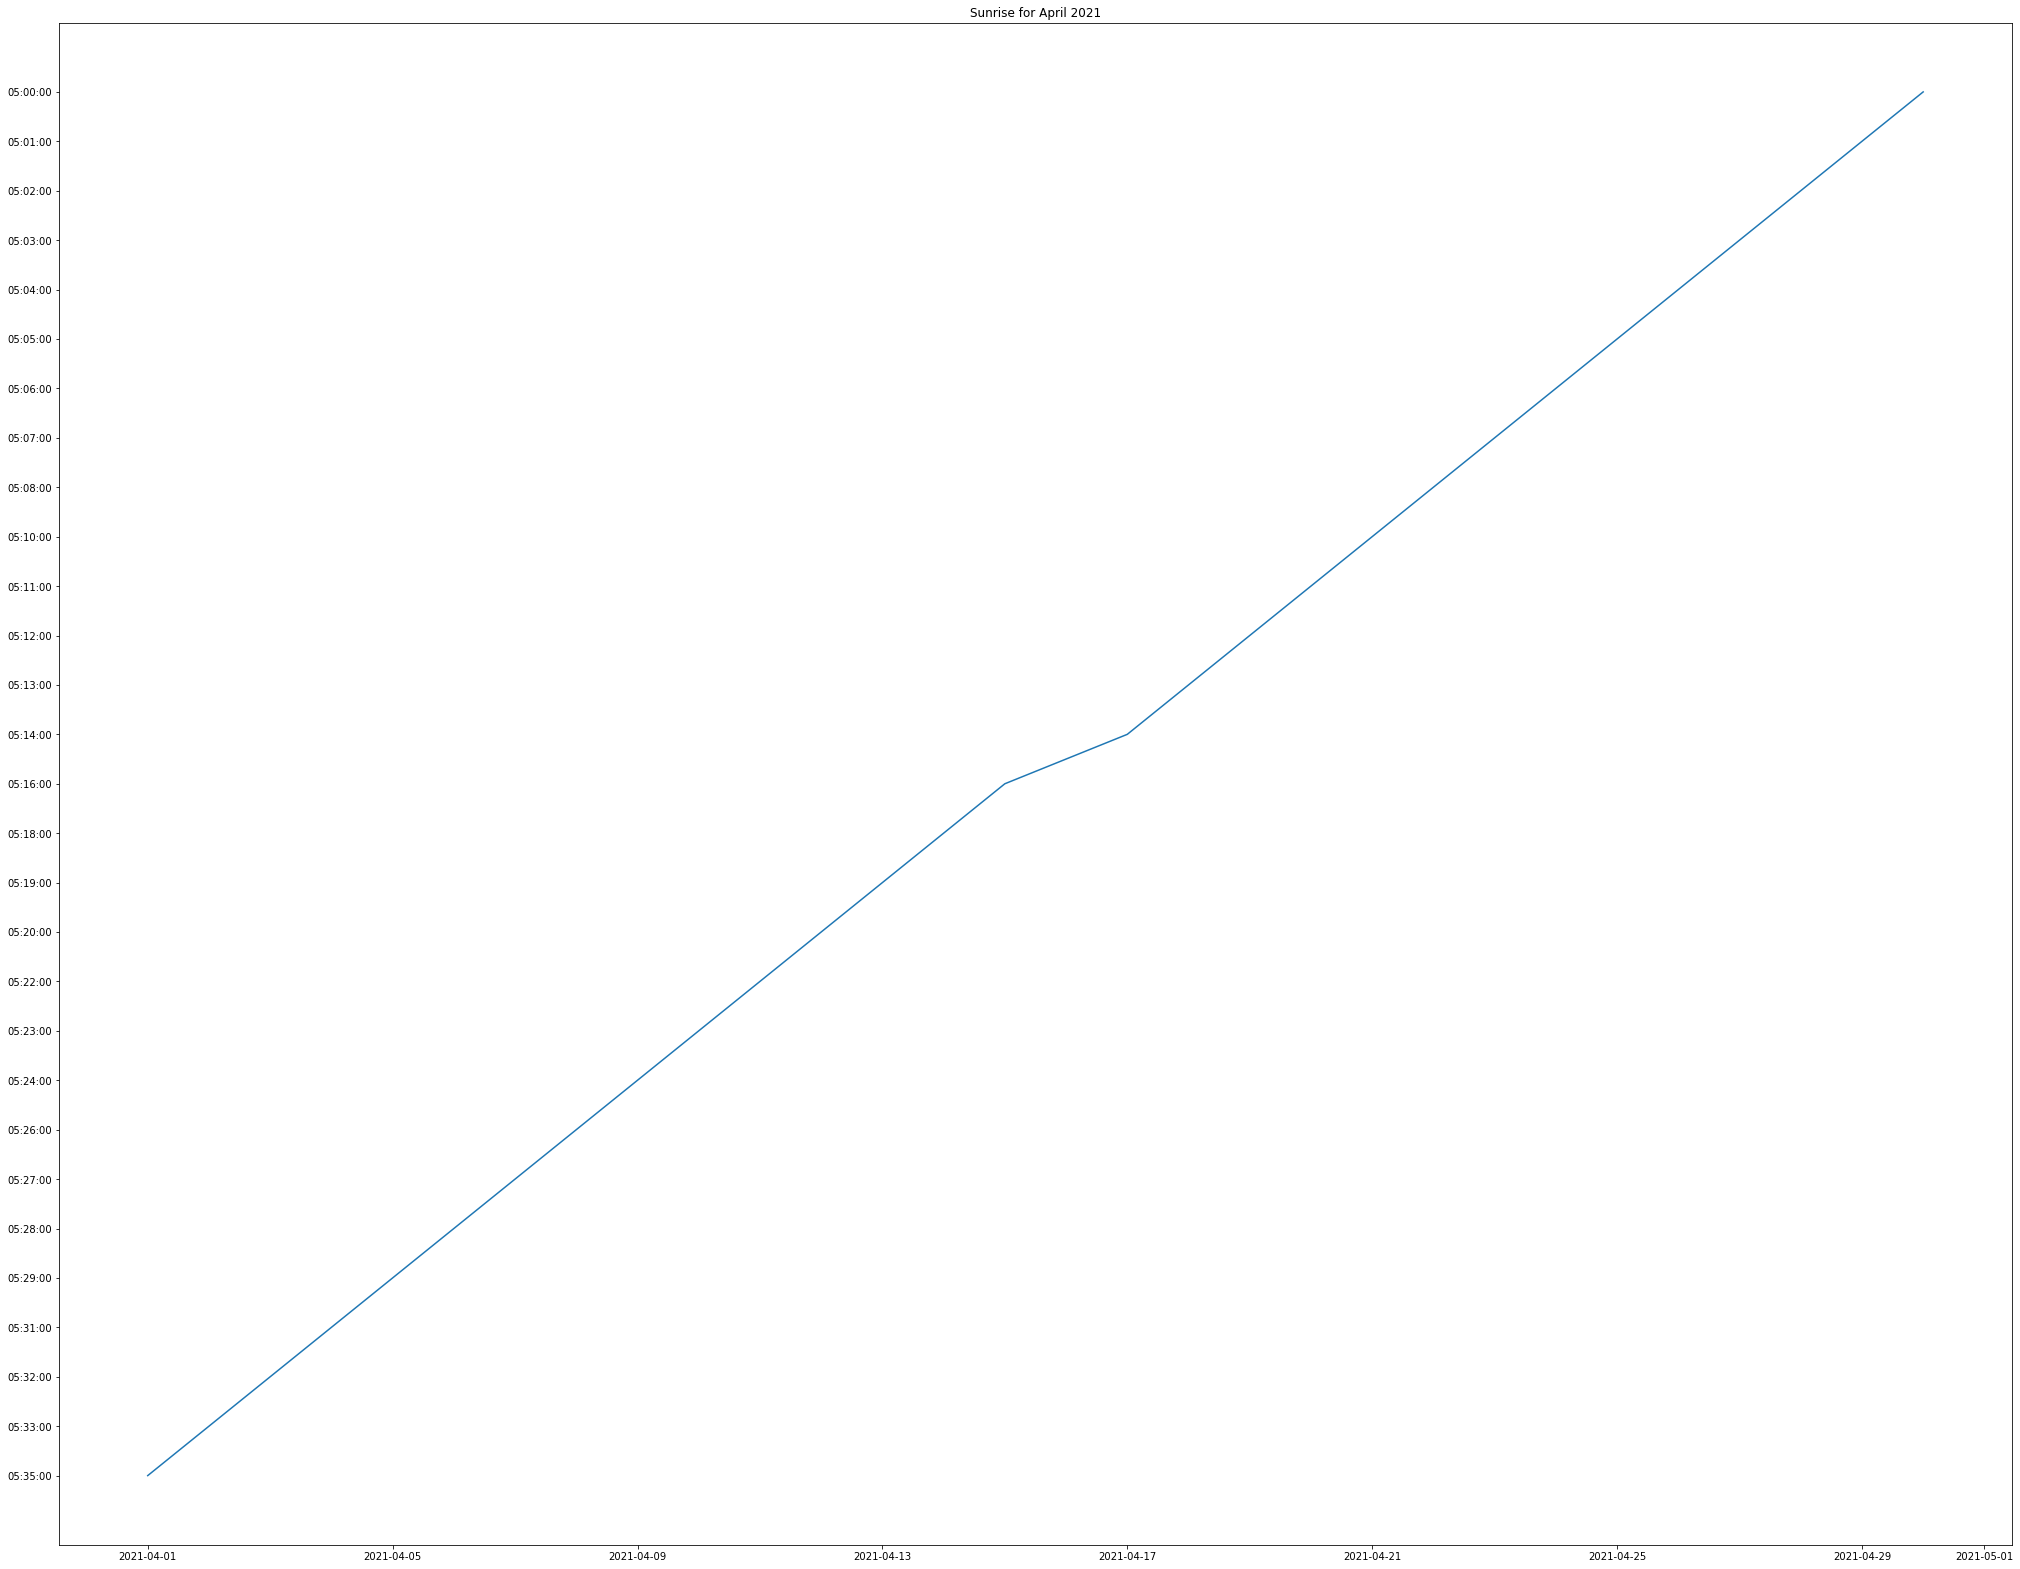

In [24]:
fig, ax = plt.subplots()

ax.plot(df_april_times['Date'], df_april_times['Sunrise'])

ax.set_title('Sunrise for ' + month_info)

fig.set_size_inches(35, 28)

plt.show()

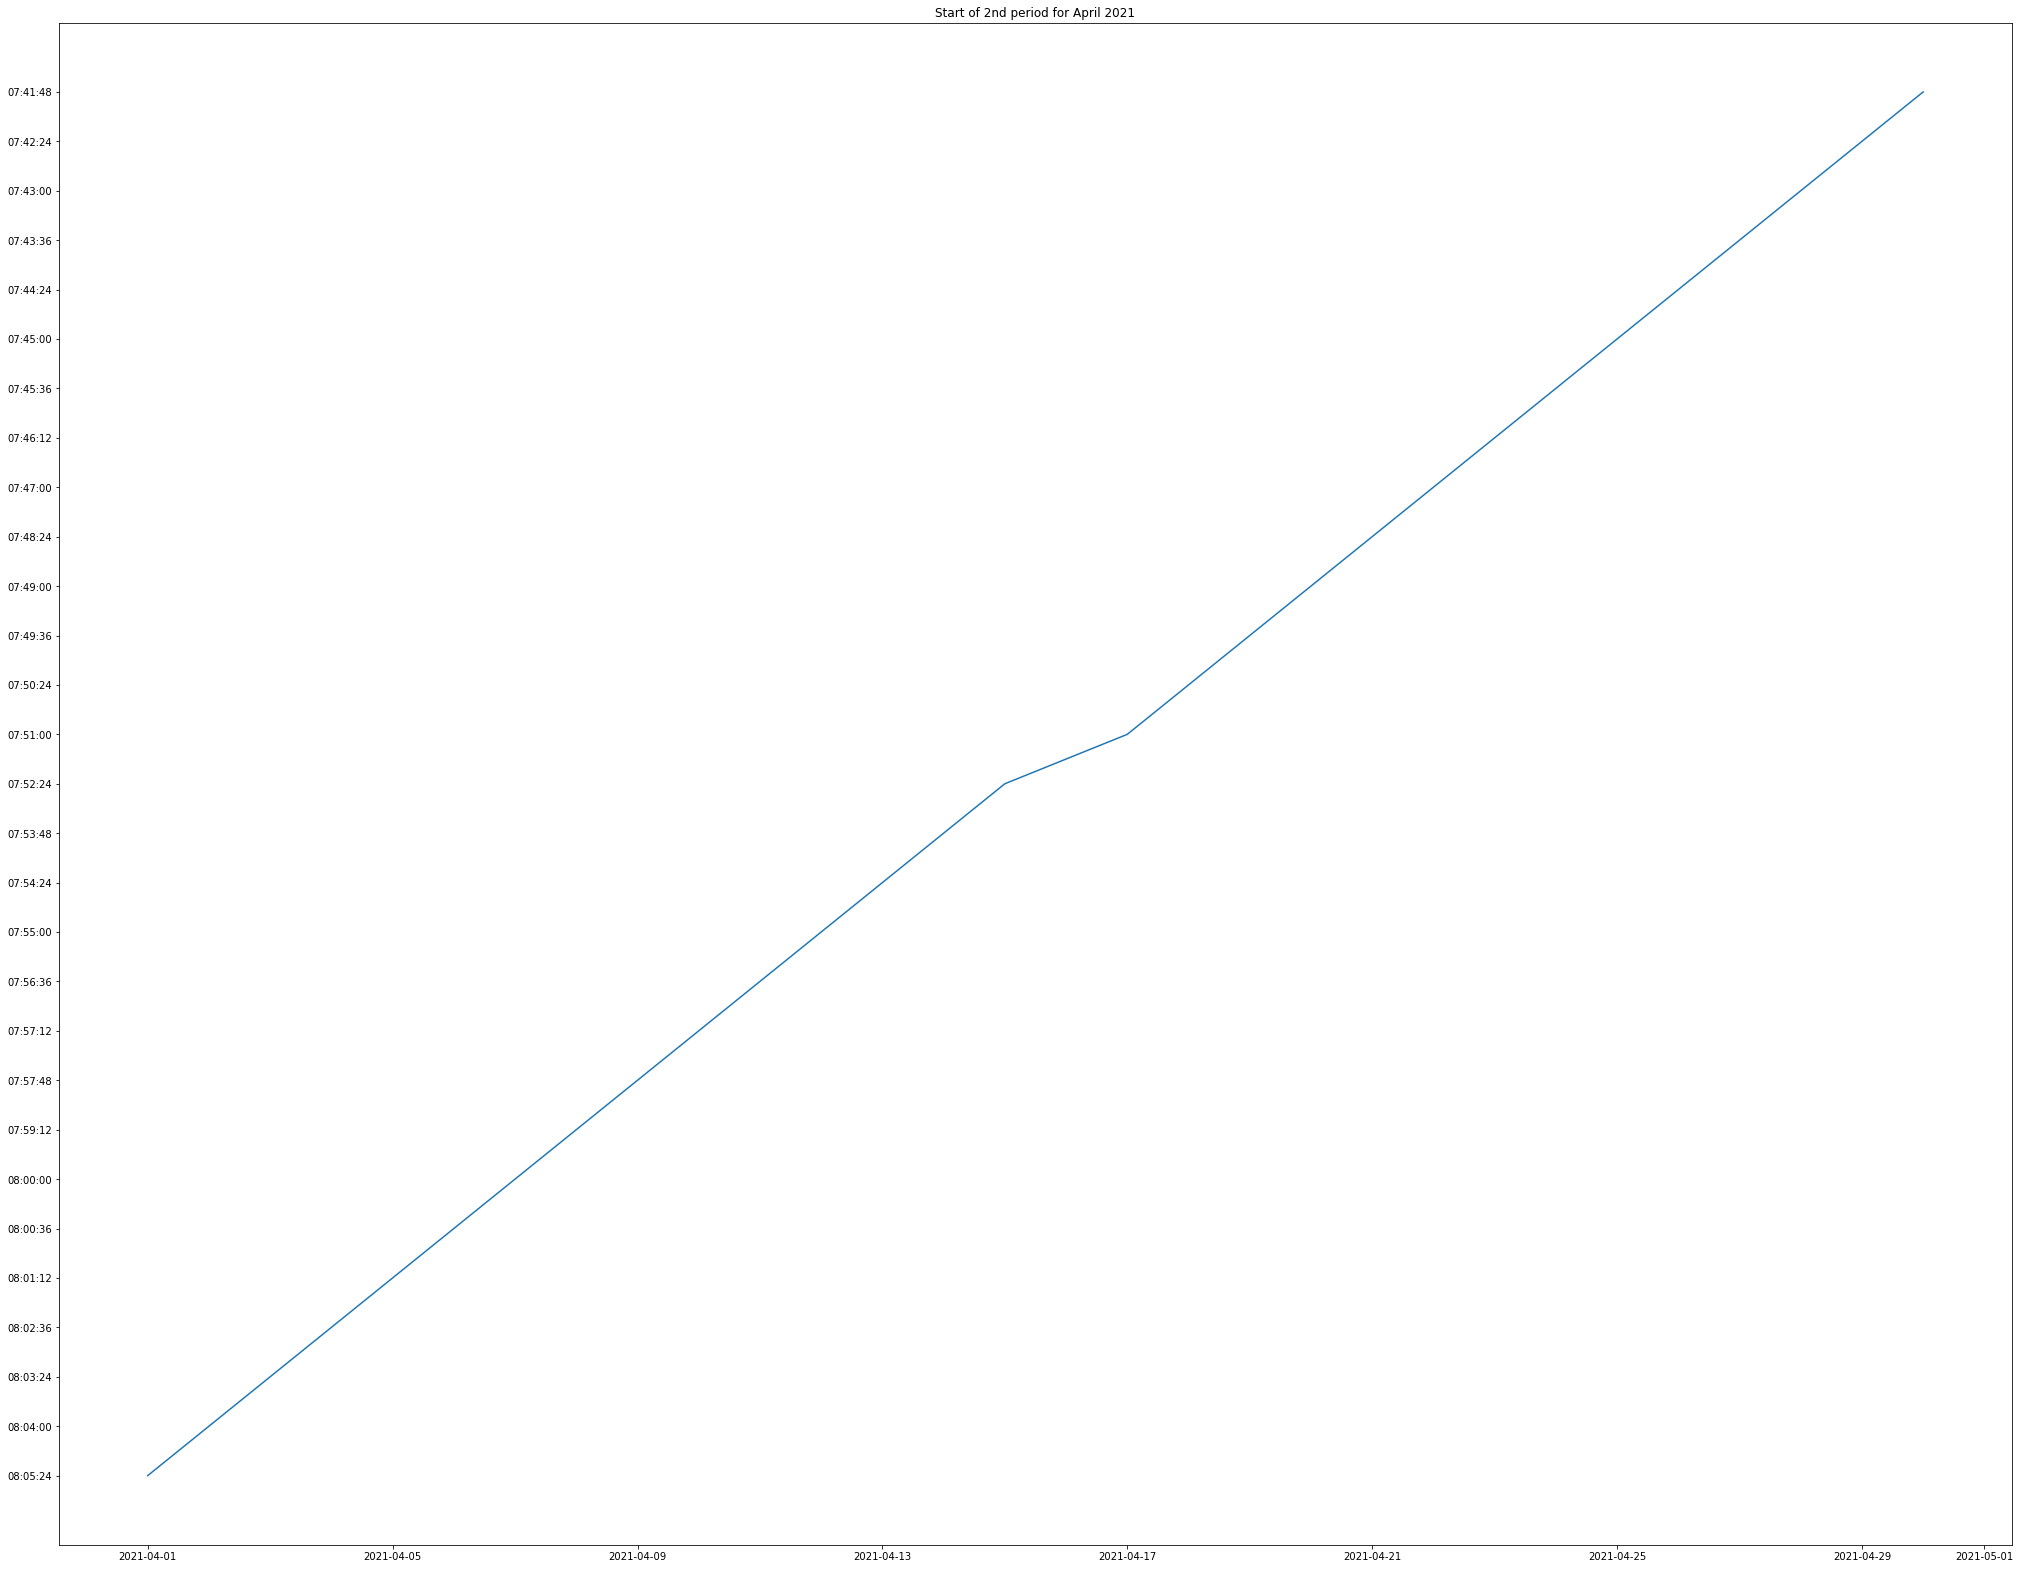

In [25]:
fig, ax = plt.subplots()

ax.plot(df_april_times['Date'], df_april_times['Start of 2nd period'])

ax.set_title('Start of 2nd period for ' + month_info)

fig.set_size_inches(35, 28)

plt.show()

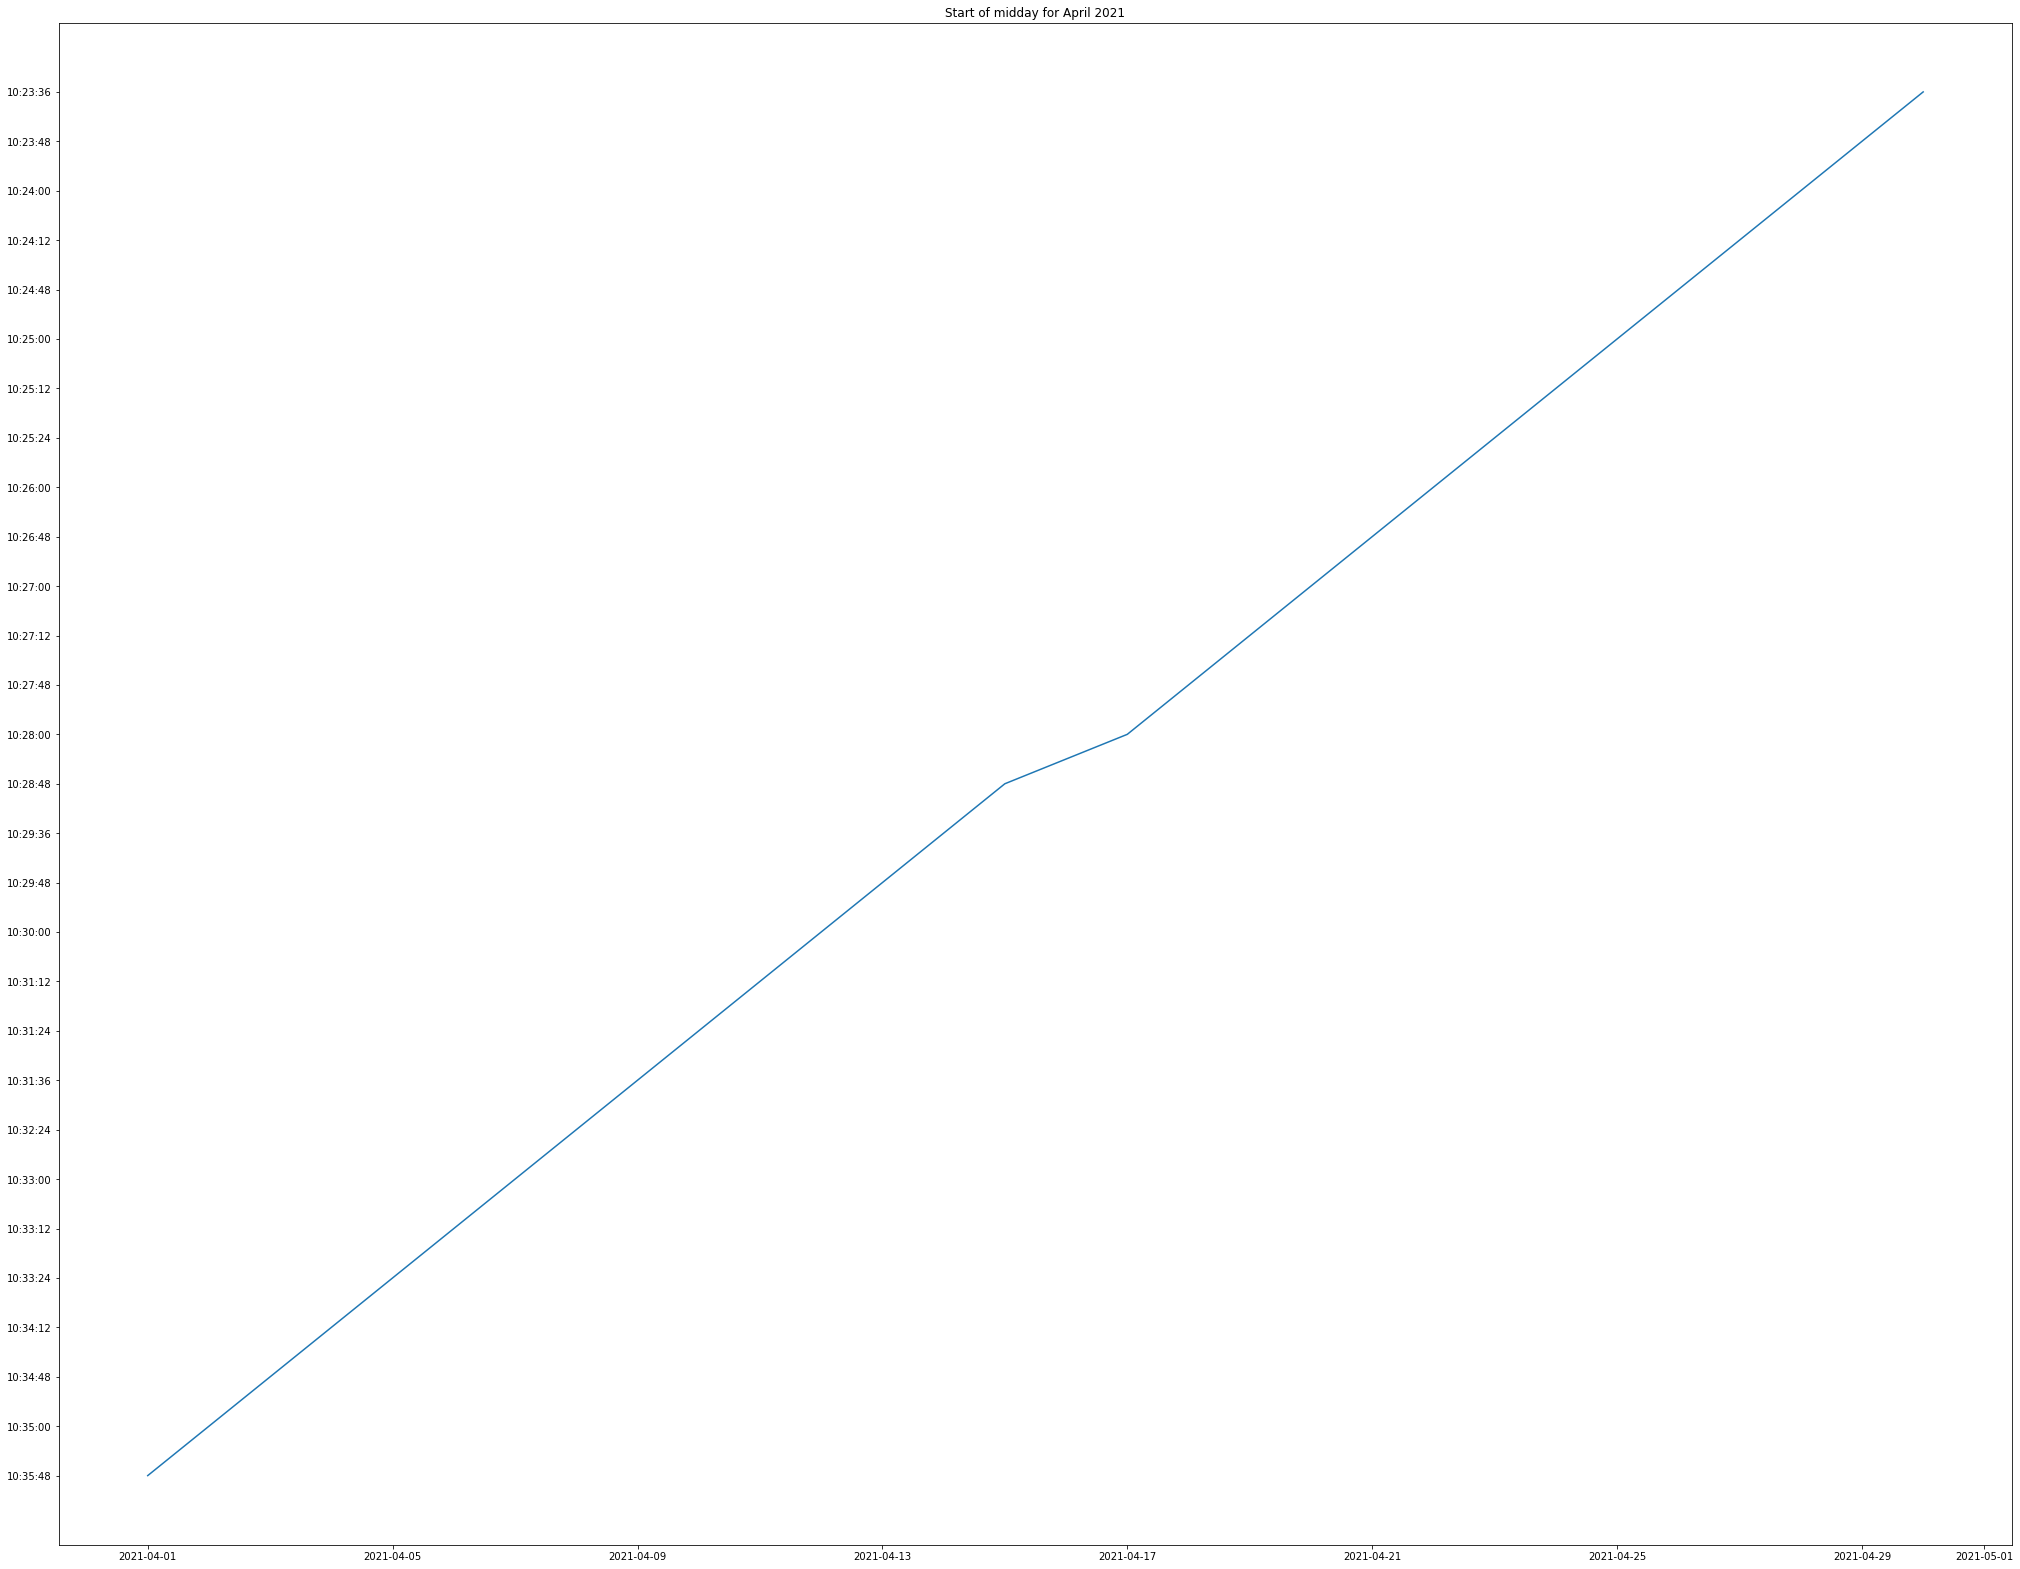

In [26]:
fig, ax = plt.subplots()

ax.plot(df_april_times['Date'], df_april_times['Start of midday'])

ax.set_title('Start of midday for ' + month_info)

fig.set_size_inches(35, 28)

plt.show()

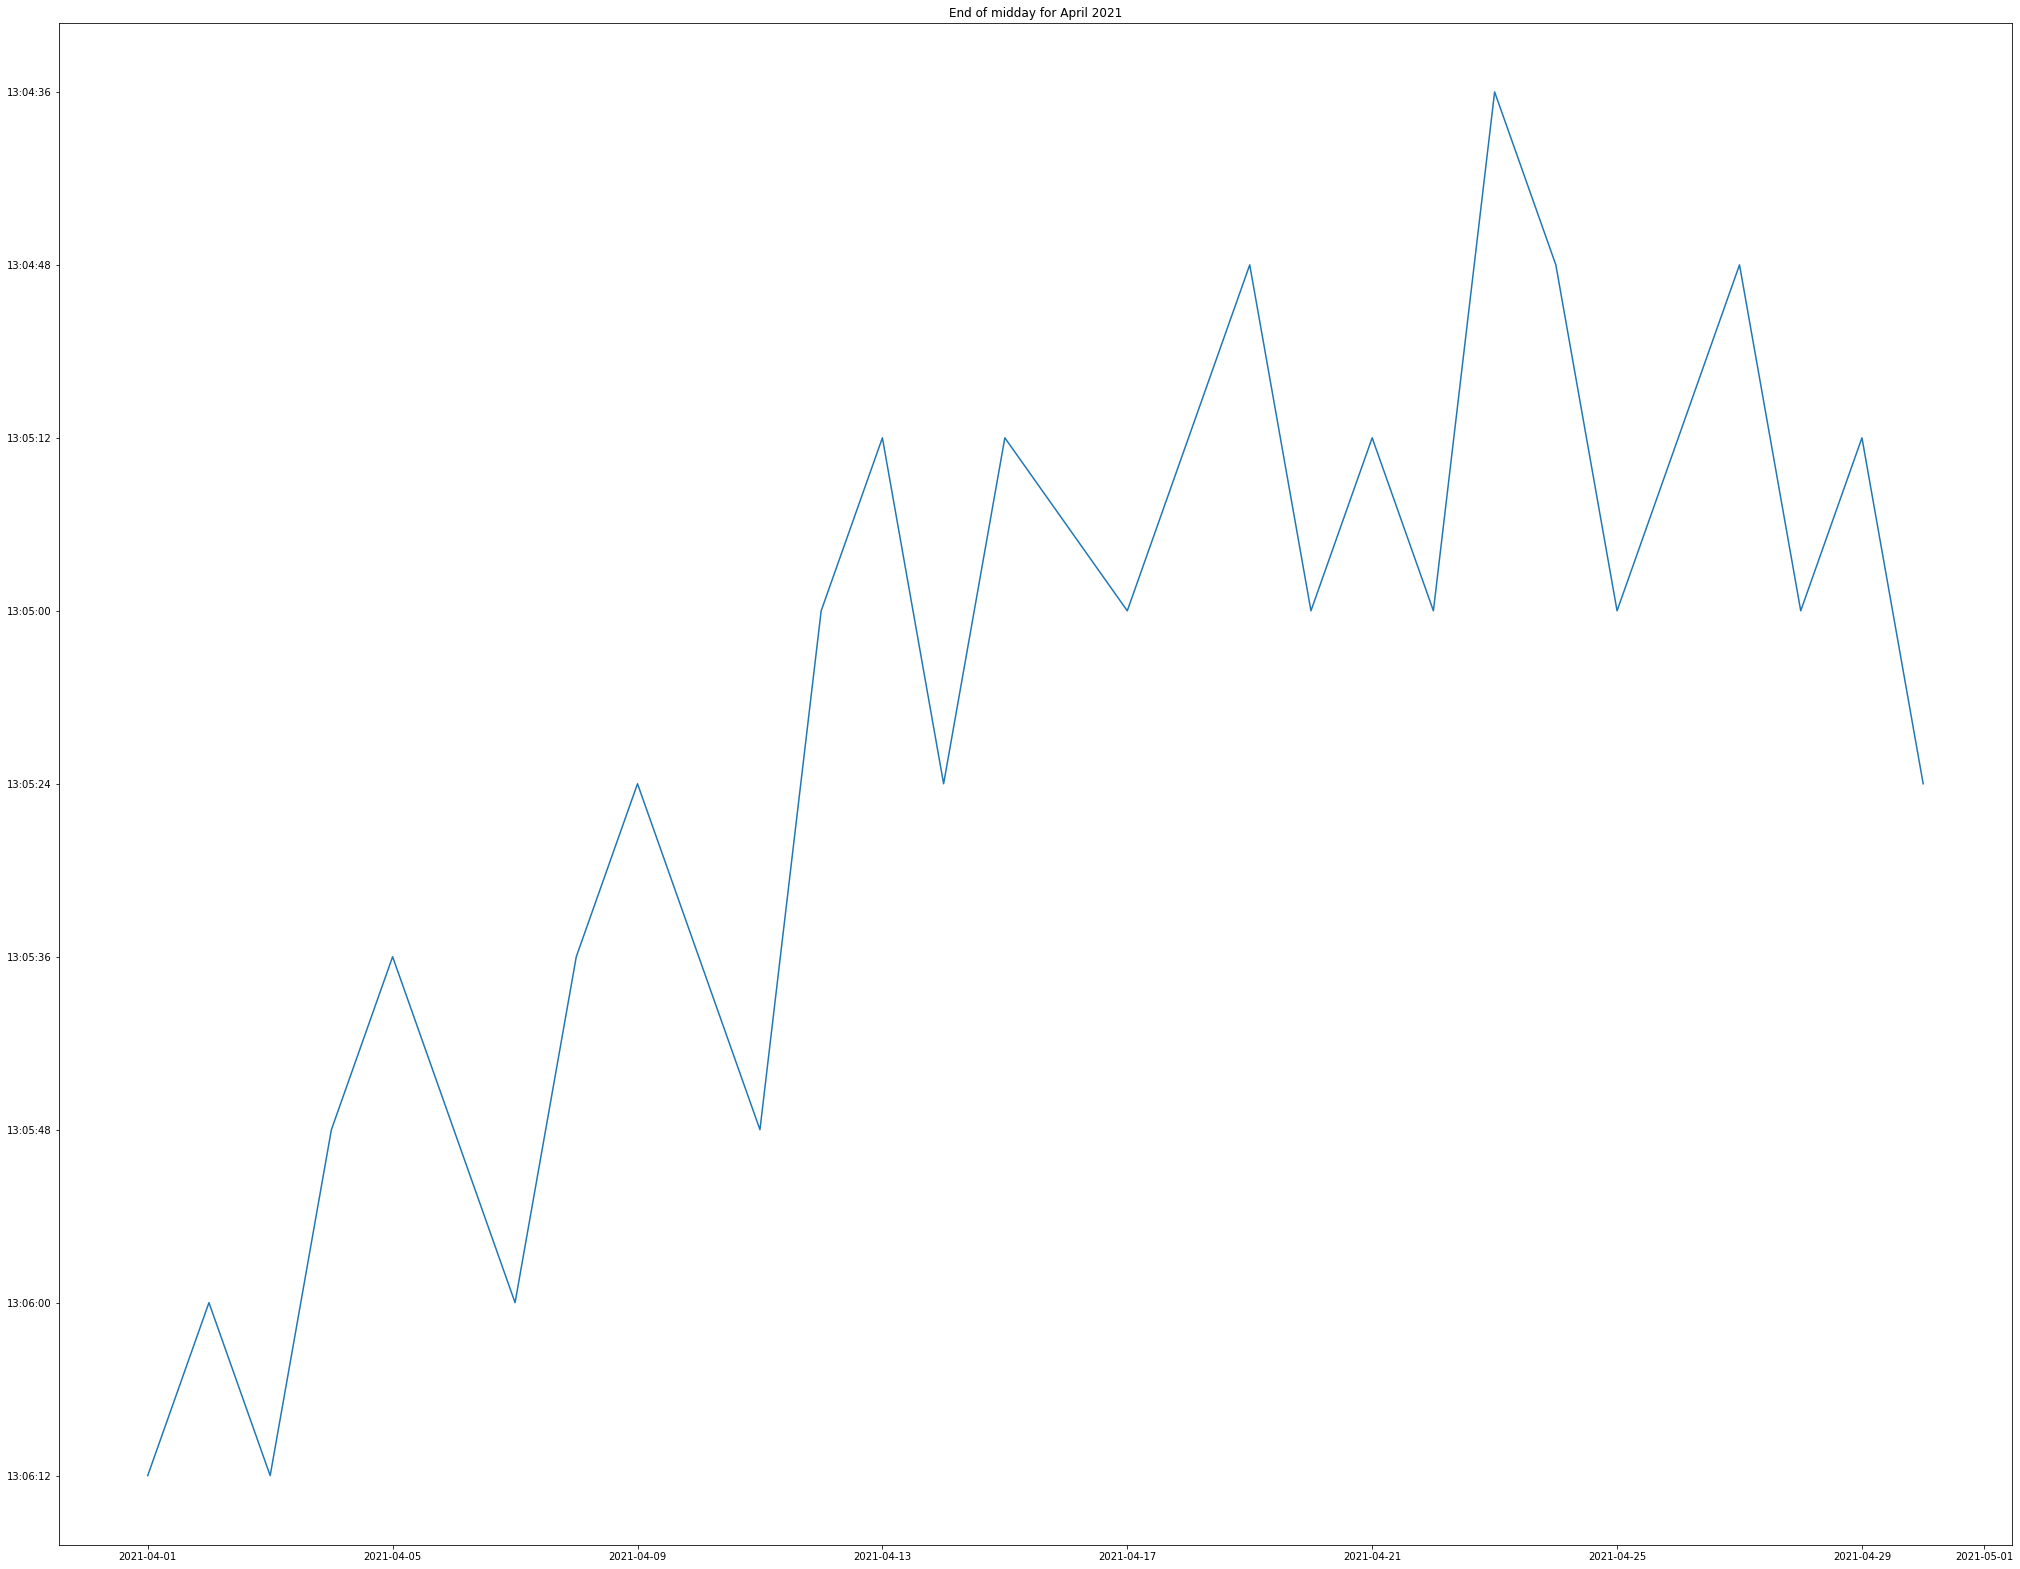

In [27]:
fig, ax = plt.subplots()

ax.plot(df_april_times['Date'], df_april_times['End of midday'])

ax.set_title('End of midday for ' + month_info)

fig.set_size_inches(35, 28)

plt.show()

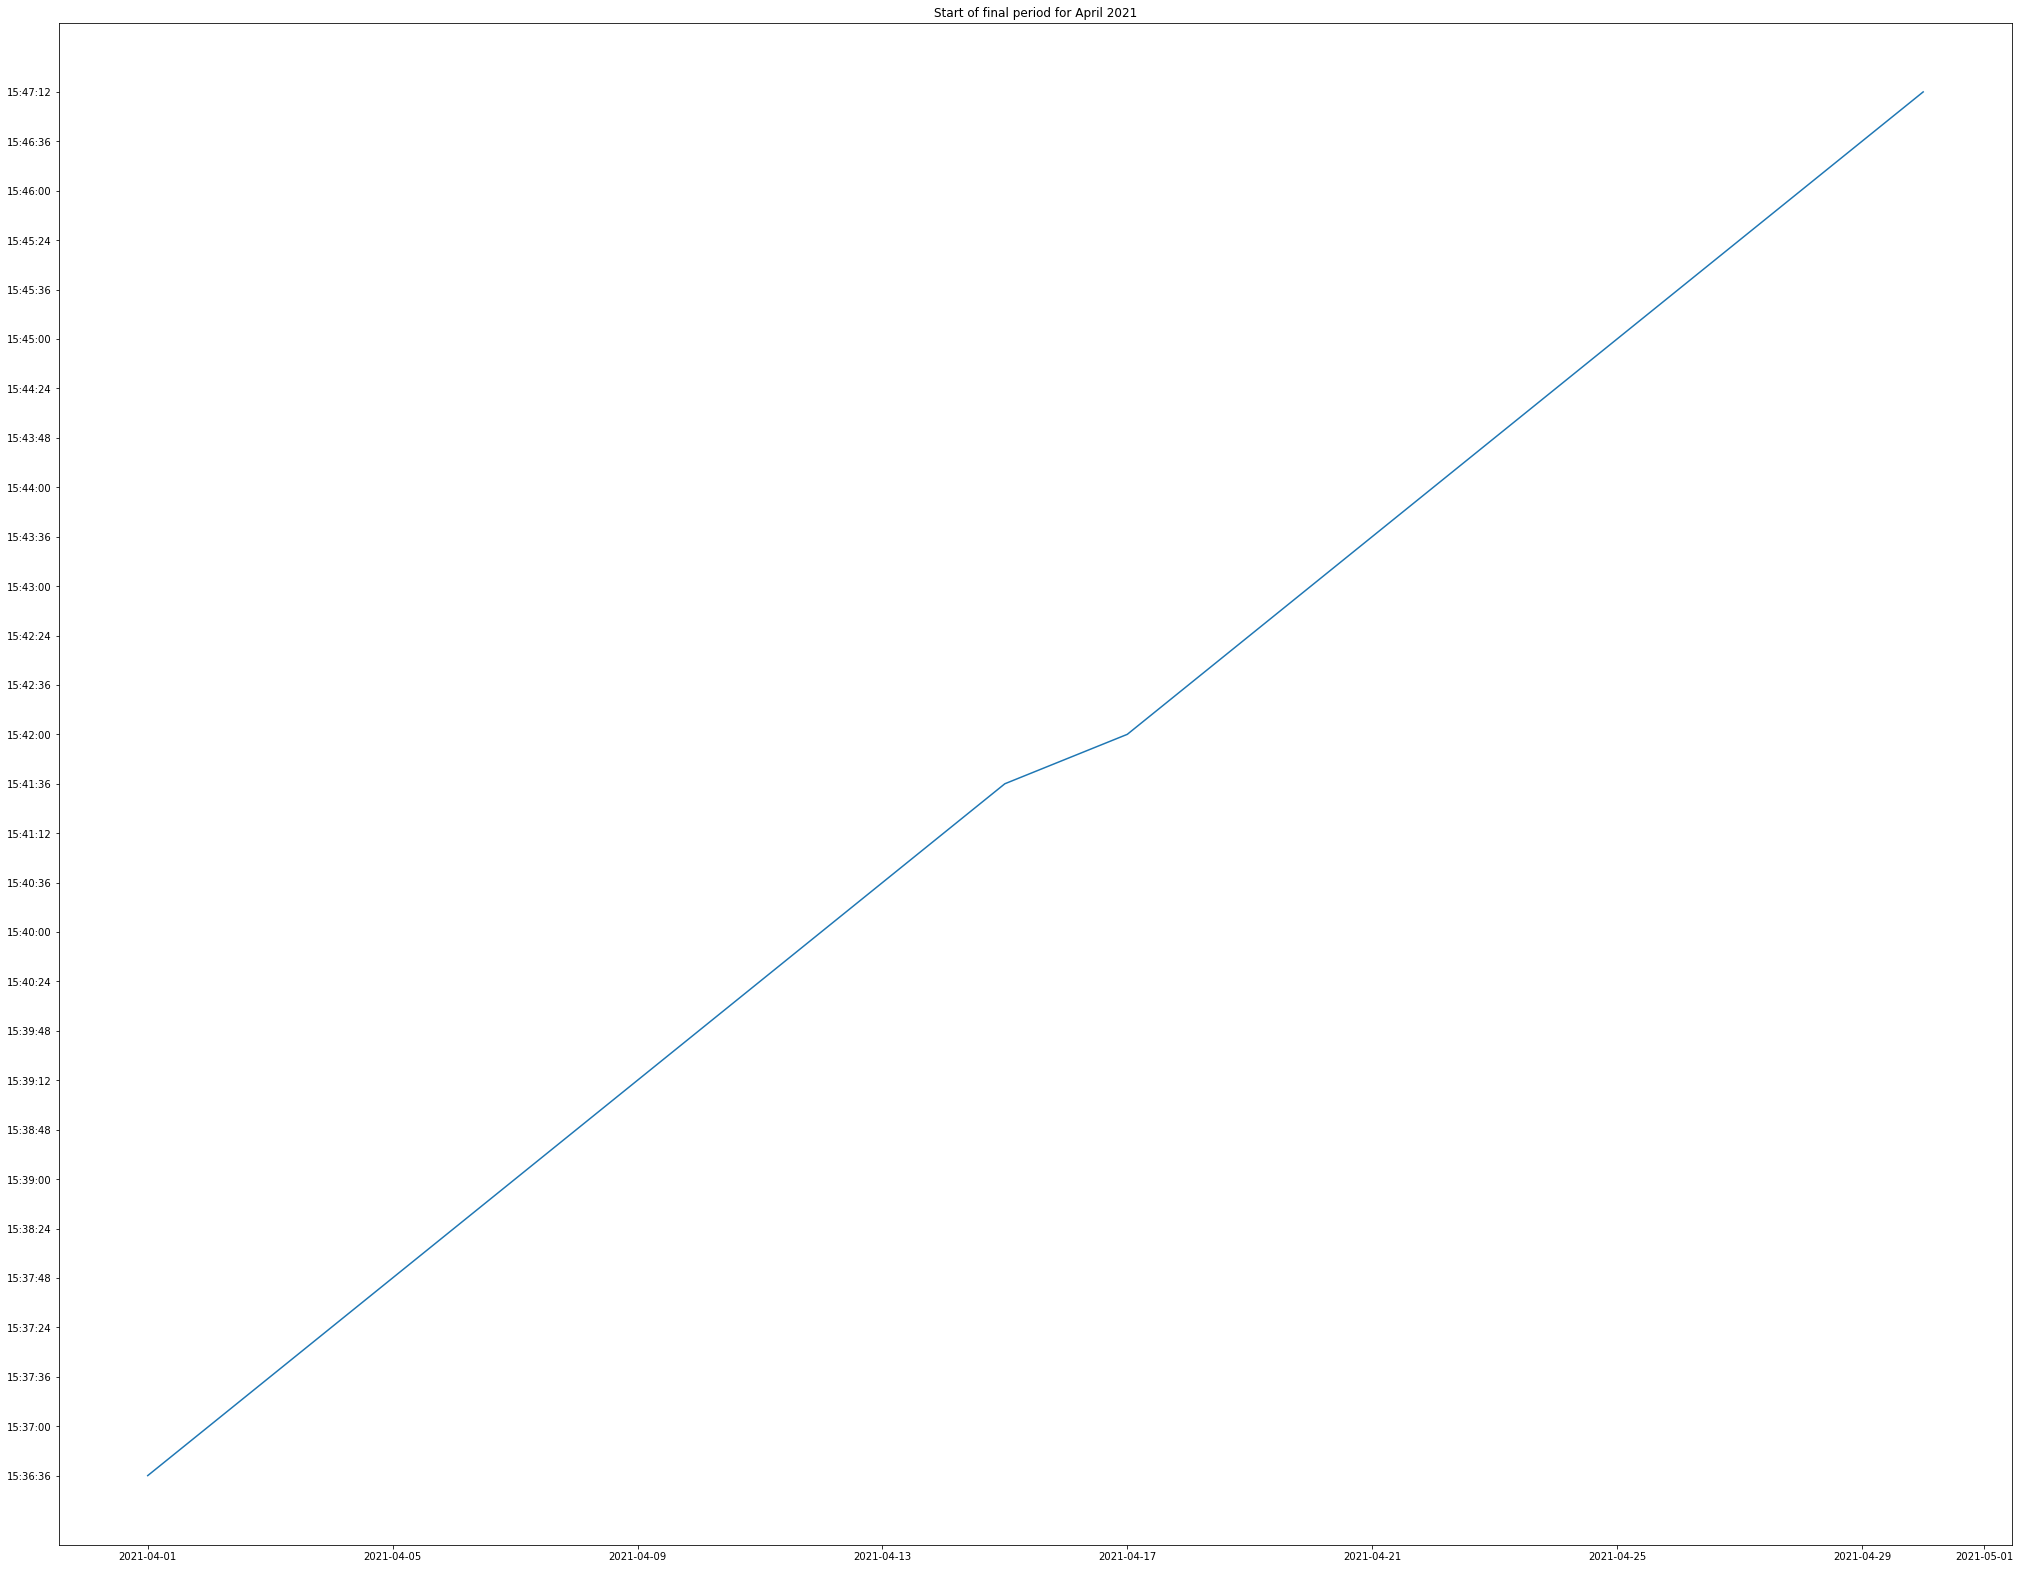

In [28]:
fig, ax = plt.subplots()

ax.plot(df_april_times['Date'], df_april_times['Start of final period'])

ax.set_title('Start of final period for ' + month_info)

fig.set_size_inches(35, 28)

plt.show()

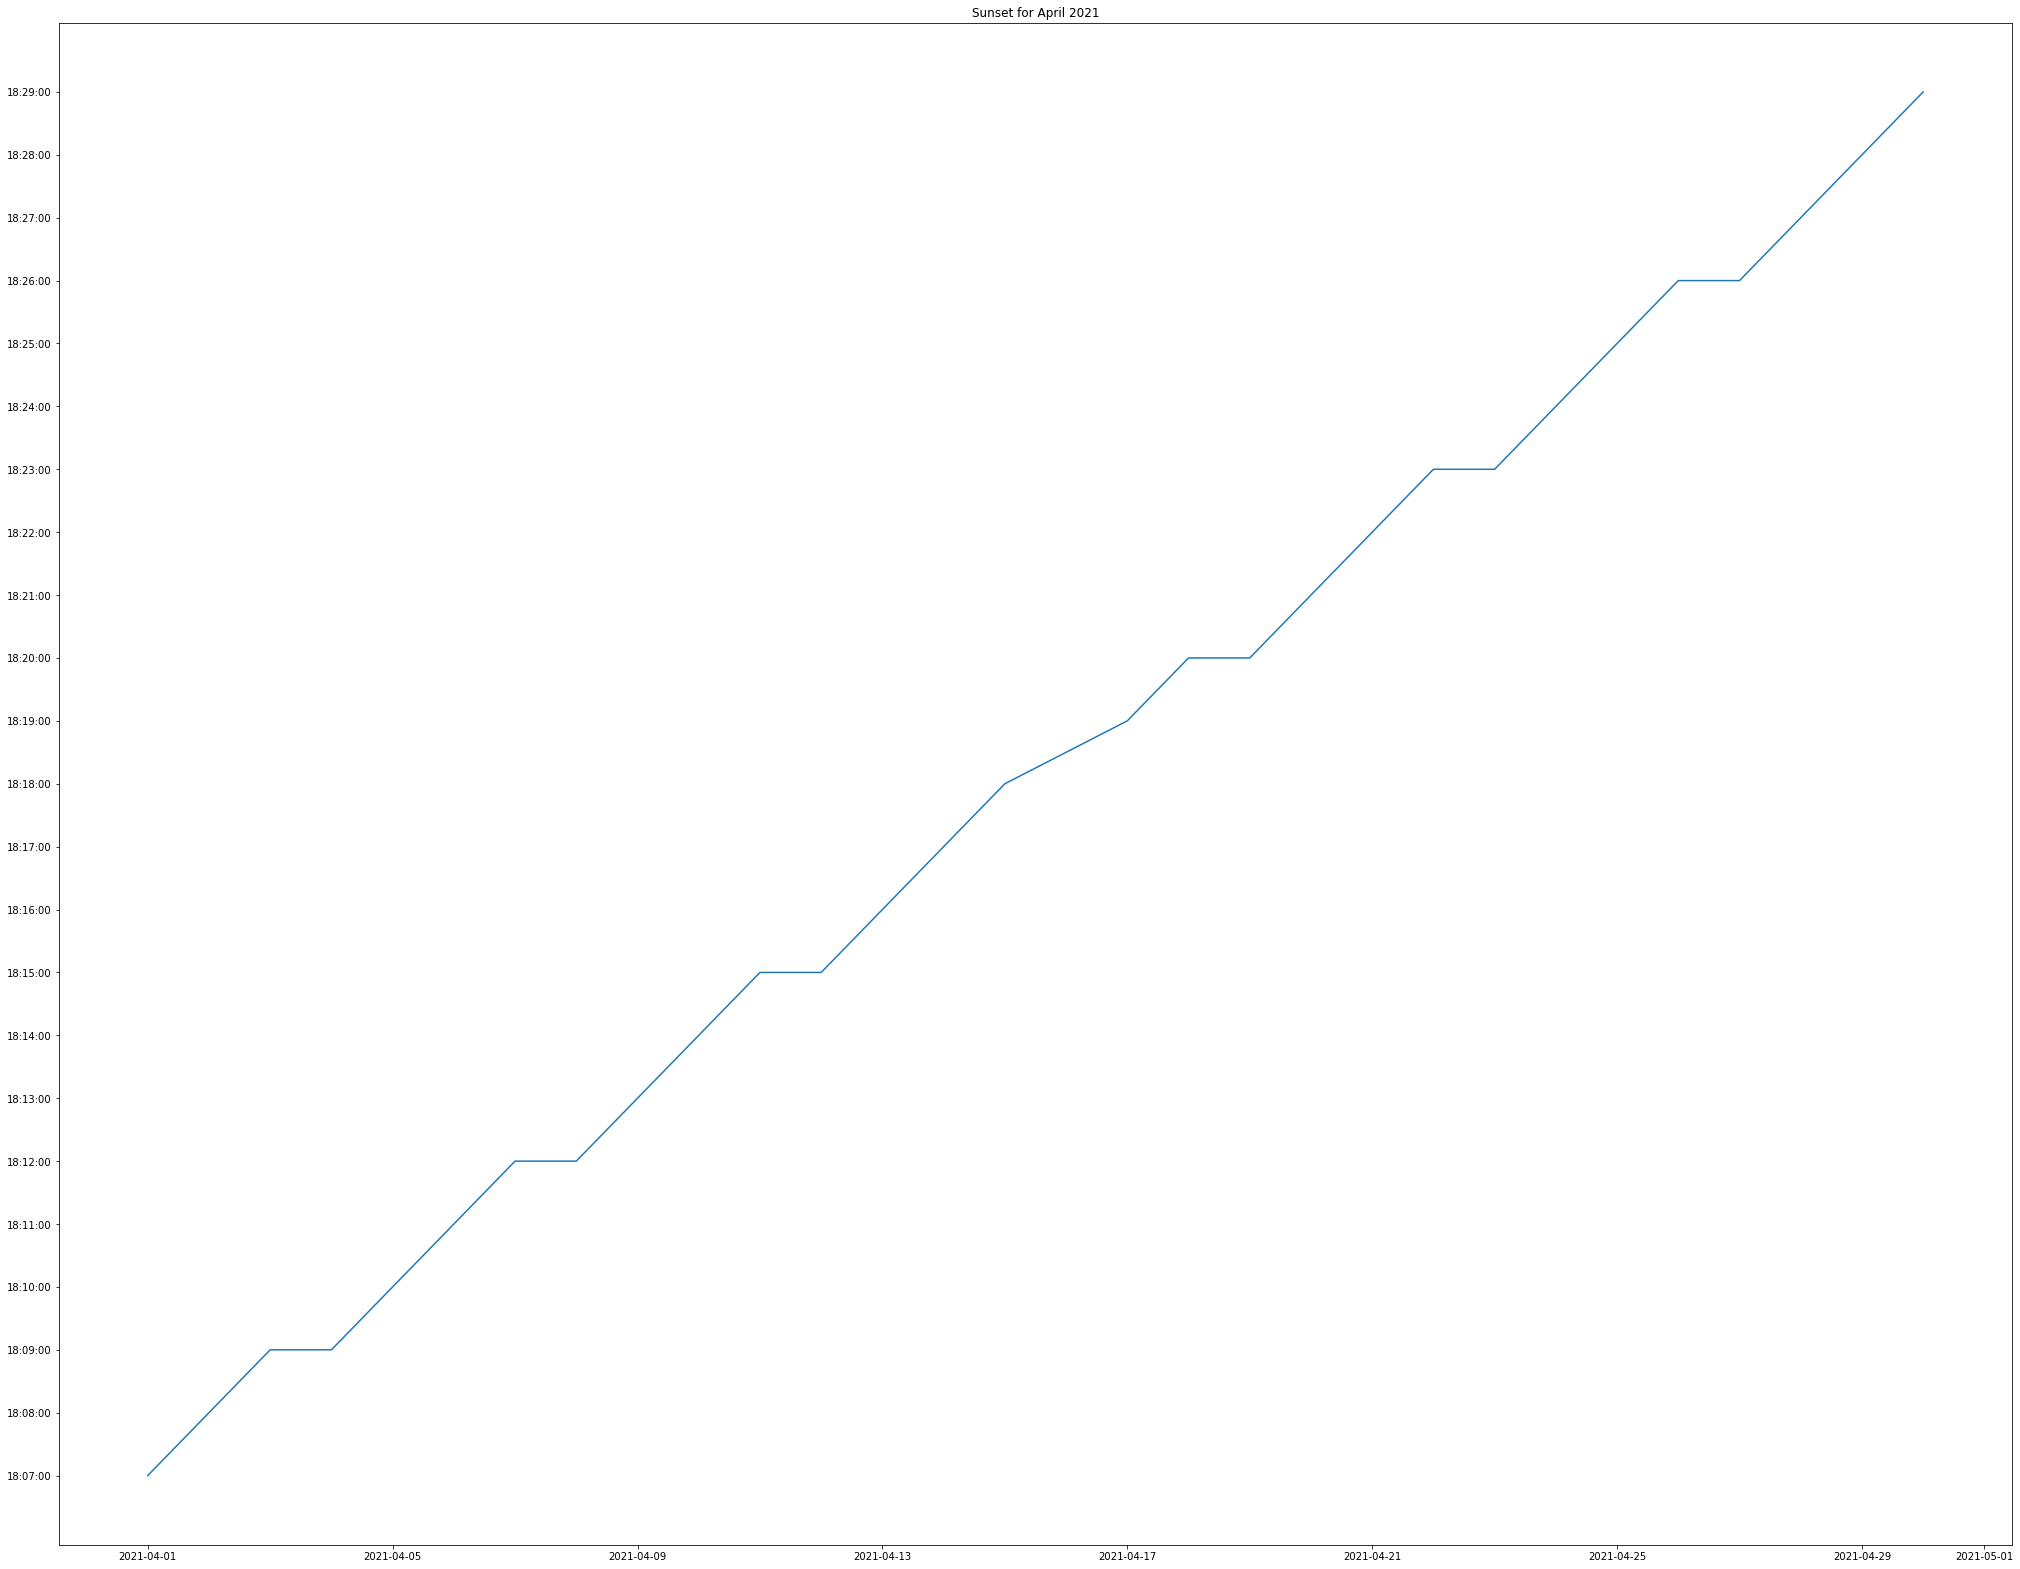

In [29]:
fig, ax = plt.subplots()

ax.plot(df_april_times['Date'], df_april_times['Sunset'])

ax.set_title('Sunset for ' + month_info)

fig.set_size_inches(35, 28)

plt.show()